In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


emnist-bymerge-test.csv
emnist-bymerge-train.csv
test.csv
train.csv



In [3]:
# Read training and test data files
train = pd.read_csv("input/emnist-bymerge-train.csv").values
test  = pd.read_csv("input/emnist-bymerge-test.csv").values



In [4]:
# Reshape and normalize training data
trainX = train[:, 1:].reshape(train.shape[0],1,28, 28).astype( 'float32' )
X_train = trainX / 255.0
y_train = train[:,0]

testX = test[:, 1:].reshape(test.shape[0],1,28, 28).astype( 'float32' )
X_test = testX / 255.0
y_test = test[:,0]

In [5]:
print(X_train.shape)
print(X_test.shape)

(697931, 1, 28, 28)
(116322, 1, 28, 28)


In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [15]:
model = Sequential()
K.set_image_dim_ordering('th')
model.add(Convolution2D(30, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(50, activation= 'relu' ))
model.add(Dense(47, activation= 'softmax' ))
  # Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(1, 28, 28..., activation="relu", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  """


In [16]:
history = model.fit(X_train, y_train,
          epochs=30,
          batch_size=1000)

Epoch 1/30
697931/697931 [==============================] - 121s 173us/step - loss: 0.8002 - acc: 0.7615
Epoch 2/30
697931/697931 [==============================] - 118s 170us/step - loss: 0.4067 - acc: 0.8604
Epoch 3/30
697931/697931 [==============================] - 118s 169us/step - loss: 0.3641 - acc: 0.8724
Epoch 4/30
697931/697931 [==============================] - 117s 167us/step - loss: 0.3425 - acc: 0.8781
Epoch 5/30
697931/697931 [==============================] - 117s 167us/step - loss: 0.3284 - acc: 0.8824
Epoch 6/30
697931/697931 [==============================] - 119s 170us/step - loss: 0.3185 - acc: 0.8848
Epoch 7/30
697931/697931 [==============================] - 119s 170us/step - loss: 0.3112 - acc: 0.8872
Epoch 8/30
697931/697931 [==============================] - 119s 170us/step - loss: 0.3052 - acc: 0.8890
Epoch 9/30
697931/697931 [==============================] - 120s 171us/step - loss: 0.2994 - acc: 0.8904
Epoch 10/30
697931/697931 [============================

In [13]:
test_loss, test_acc = model.evaluate(X_test,y_test)

116322/116322 [==============================] - 20s 176us/step


In [14]:
test_loss, test_acc

(0.3480730035219025, 0.8777617303691477)

In [17]:
model.save('model.h5')

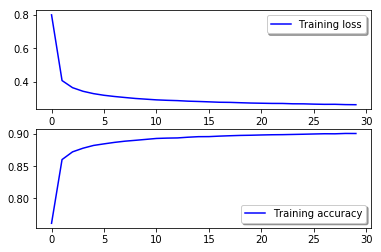

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)